### READ ME

Use the code blocks below to answer each question. Only print the output required for each question. Do not edit the comments at the top of each code cell. Otherwise, the auto-grader may misinterpret your results. See Question 0 as an an example of how to complete a task (leave it in your notebook; don't delete it):

In [193]:
# from google.colab import drive
# drive.mount('/content/drive')

In [194]:
# Question 0: Create a DataFrame with three rows and four columns. Name the 
# columns 'Col1', 'Col2', 'Col3', 'Col4'. Create an index for the DataFrame
# and give the rows the index values of 'Row1', 'Row2', 'Row3'. Place a value
# in each column equal to the {ColumnName/RowName}. e.g. Col1/Row1. Print
# the entire DataFrame.

import pandas as pd

df = pd.DataFrame(columns=['Col1', 'Col2', 'Col3', 'Col4'], index=['Row1', 'Row2', 'Row3'])

for col in df:
  for i, value in df[col].items():
    df.at[i, col] = f'{i}/{col}'

df

Col1       Col2       Col3       Col4
Row1  Row1/Col1  Row1/Col2  Row1/Col3  Row1/Col4
Row2  Row2/Col1  Row2/Col2  Row2/Col3  Row2/Col4
Row3  Row3/Col1  Row3/Col2  Row3/Col3  Row3/Col4

## **Data Import**

In [195]:
# Question 1: Import the data file posted along with this assignment called
# 'student_enrollment_sample.csv'. This file contains real data from a large 
# online university in the United States. The identifying information has been
# deleted or randomized to maintain anonymity according to FERPA requirements. 
# This university wants to help their students succeed. However, many of them
# drop out for a variety of reasons. Some feel hopeless, helpless, or lost. The
# university wants to identify those students who are currently active, but
# likely to drop in the near future so that they can intervene and get the them 
# additional help. Your task is to create a predictive model to classify those 
# students who are predicted to drop, but currently active to give to the
# advisement center for targeted interventions. Complete the steps as outlined
# in the questions to complete this task.

# First, print out the first five records of the dataset. How many students are 
# in this sample?
df = pd.read_csv(r'student_enrollment_sample.csv')
display(df.head())
print(df.shape[0])

EXPECTED_START_DATE GRADUATION_DATE  ENROLL_COUNT  NUMBER_AVERAGE  \
0                 NaN             NaN           1.0             0.0   
1                 NaN        2/8/2016           1.0             0.0   
2                 NaN             NaN           1.0             0.0   
3                 NaN             NaN           1.0             0.0   
4                 NaN             NaN           1.0             0.0   

   MINUTES_ATTENDED  HOURS_ATTEMPTED  HOURS_EARNED  AR_BALANCE_AMOUNT  \
0               NaN              0.0           0.0                0.0   
1               NaN              0.0           0.0                0.0   
2               NaN              0.0           0.0                0.0   
3               NaN              0.0           0.0                0.0   
4               NaN              0.0           0.0                0.0   

   MINUTES_ABSENT  DAYS_ABSENT  ...  CREDITS_LEFT  ENROLLMENT_COUNT  \
0             NaN          0.0  ...           NaN               NaN   
1             NaN          0.0  ...           NaN               NaN   
2             NaN          0.0  ...         180.0               2.0   
3             NaN          0.0  ...          60.0               3.0   
4             NaN          0.0  ...           NaN               NaN   

  MODS_ATTENDED_COUNT HS_GRADUATED_FLAG DISABLED_FLAG  HISPANIC_FLAG  \
0                 NaN               NaN           NaN            NaN   
1                 NaN               NaN           NaN            NaN   
2                 0.0               0.0           0.0            0.0   
3                 0.0               0.0           0.0            1.0   
4                 NaN               NaN           NaN            NaN   

   VETERAN_FLAG               STATUS_DESCRIPTION  IN_SCHOOL_FLAG  \
0           NaN            Application Cancelled             0.0   
1           NaN                        Applicant             0.0   
2           0.0  Pending Applicant - Portal Only             0.0   
3           0.0                        Applicant             0.0   
4           NaN  Pending Applicant - Portal Only             0.0   

   SIMPLE_STATUS_DESCRIPTION  
0                      Other  
1                      Other  
2                      Other  
3                      Other  
4                      Other  

[5 rows x 35 columns]

50001


# **Two-Class Modeling**

## **Data Cleaning**

### Missing Values

In [196]:
# Question 2: Print out a list of missing values for each column in the 
# dataset. HINT: search for 'pandas .isna() example'
df.isna().sum().sort_values(ascending=False)

CUMMULATIVE_GPA_CREDITS      37157
CUMMULATIVE_GPA_POINTS       37157
MINUTES_ABSENT               16297
MINUTES_MAKEUP               16297
MINUTES_ATTENDED             16287
CUMMULATIVE_GPA              15550
LAST_ACTIVITY_DATE            4388
EXPECTED_START_DATE           1871
GRADUATION_DATE               1598
COHORT_YEAR                   1375
BIRTH_DATE                    1361
CREDITS_LEFT                  1336
CREDITS_REQUIRED              1336
MOD_NUMBER                    1324
DISABLED_FLAG                 1323
CREDITS_EARNED                1323
CREDITS_ATTEMPTED             1323
HS_GRADUATED_FLAG             1323
AR_BALANCE                    1323
ENROLLMENT_COUNT              1323
HISPANIC_FLAG                 1323
MODS_ATTENDED_COUNT           1323
VETERAN_FLAG                  1323
ENROLLMENT_GPA                1322
PROGRAM_GROUP                   14
STATUS_DESCRIPTION               1
IN_SCHOOL_FLAG                   1
AR_BALANCE_AMOUNT                1
DAYS_ABSENT         

In [197]:
# Question 3: Make a copy of the original DataFrame to work with
# (in case we want to use the original again later). Iterate through
# the new DataFrame and remove any column that has more than 30% of
# the records/cases missing. Print out a summary of missing value
# percentages for each remaining column.
copy_df = df.copy()
# drop columns with more than 30% null values
for col in copy_df:
    if (copy_df[col].isna().sum()) / (copy_df.shape[0]) > .3:
        copy_df.drop(columns=col, inplace=True)


# print summary of null percentage for each remaining column
for col in copy_df:
    print(f'{col}: Null percentage: {(copy_df[col].isna().sum()) / (copy_df.shape[0])}')


EXPECTED_START_DATE: Null percentage: 0.0374192516149677
GRADUATION_DATE: Null percentage: 0.03195936081278374
ENROLL_COUNT: Null percentage: 1.999960000799984e-05
NUMBER_AVERAGE: Null percentage: 1.999960000799984e-05
HOURS_ATTEMPTED: Null percentage: 1.999960000799984e-05
HOURS_EARNED: Null percentage: 1.999960000799984e-05
AR_BALANCE_AMOUNT: Null percentage: 1.999960000799984e-05
DAYS_ABSENT: Null percentage: 1.999960000799984e-05
REENTRY_NUMBER: Null percentage: 1.999960000799984e-05
PROGRAM_GROUP: Null percentage: 0.0002799944001119978
BIRTH_DATE: Null percentage: 0.02721945561088778
LAST_ACTIVITY_DATE: Null percentage: 0.08775824483510329
MOD_NUMBER: Null percentage: 0.026479470410591788
COHORT_YEAR: Null percentage: 0.02749945001099978
AR_BALANCE: Null percentage: 0.02645947081058379
ENROLLMENT_GPA: Null percentage: 0.02643947121057579
CREDITS_ATTEMPTED: Null percentage: 0.02645947081058379
CREDITS_EARNED: Null percentage: 0.02645947081058379
CREDITS_REQUIRED: Null percentage: 0

In [198]:
# Question 4: Drop all remaining rows that contain any missing data.
# Print out the numer of rows and columns in the remaining dataset.
copy_df = copy_df.dropna()
copy_df.shape

(44965, 29)

### Handle Dates

In [199]:
# Question 5: Now it's time to handle the date values. LAST_ACTIVITY_DATE,
# EXPECTED_START_DATE, BIRTH_DATE, and GRADUATION_DATE may all be useful. 
# For LAST_ACTIVITY_DATE, EXPECTED_START_DATE, and BIRTH_DATE, replace the 
# date value with the number of days between that date and 2022-1-1. In other
# words: 2022-1-1 minus the date value in the field. For GRADUATION_DATE, 
# replace the date value with the number of days until graduation assuming
# that today's date is 2020-1-1. In other words, calculate: GRADUATION_DATE 
# minus 2020-1-1. Print out the first five rows to examine the results.

copy_df['LAST_ACTIVITY_DATE'] = (pd.to_datetime('2022-01-01') - pd.to_datetime(copy_df['LAST_ACTIVITY_DATE']).dt.tz_localize(None)).dt.days
copy_df['EXPECTED_START_DATE'] = (pd.to_datetime('2022-01-01') - pd.to_datetime(copy_df['EXPECTED_START_DATE']).dt.tz_localize(None)).dt.days
copy_df['BIRTH_DATE'] = (pd.to_datetime('2022-01-01') - pd.to_datetime(copy_df['BIRTH_DATE']).dt.tz_localize(None)).dt.days
copy_df['GRADUATION_DATE'] = (pd.to_datetime(copy_df['GRADUATION_DATE']) - pd.to_datetime('2020-01-01')).dt.days

copy_df[['LAST_ACTIVITY_DATE', 'EXPECTED_START_DATE', 'BIRTH_DATE', 'GRADUATION_DATE']].head()

LAST_ACTIVITY_DATE  EXPECTED_START_DATE  BIRTH_DATE  GRADUATION_DATE
1873                 262                  236       12991             1572
1874                 263                  236         236             1544
1875                 262                  236       15512             1544
1876                 262                  236        7221             1040
1878                 262                  236        7298             1040

### Bin Categorical Values

In [200]:
# Question 6: The PROGRAM_GROUP feature indicates which academic program
# the student is working on. Some of them are very small programs and 
# represent less than five percent of the data. We need to bin those programs
# into a new value called "Other". Start by printing a list of PROGRAM_GROUP
# values divided by the total number of records in order to see what percent
# of the cases they represent. Then, iterate through the rows and change every 
# program value to "Other" if it does not belong to a PROGRAM_GROUP that 
# represents at least five percent of the cases. Finally, print out the new 
# listof PROGRAM_GROUP values (including the new 'Other') to make sure your
# routine worked correctly. You do not need to print the values in 'percent'
# format. The original decimal values are fine.

# print out original percentages of each program group
# value_counts = copy_df['PROGRAM_GROUP'].value_counts()
# for program in value_counts.index:
#     print(f'Program: {program} percent represented: {value_counts[program]/ copy_df.shape[0]}')
   

def bin_categories(df, features=[], cutoff=0.05, replace_with="Other", messages=True):
    import pandas as pd

    if len(features) == 0:
        features = df.columns

    for feat in features:
        if feat in df.columns:
            # get a list of group values and their percent of rows
            if not pd.api.types.is_numeric_dtype(df[feat]):
                group_count = df[feat].value_counts()
                other_list = group_count[group_count / df.shape[0] < cutoff].index
                df.loc[df[feat].isin(other_list), feat] = replace_with
            # filter the list down to those that represent less than 5% of the rows
            # update the group name to "Other" for all of those filtered values

        else:
            print(f"{feat} not found in dataframe")    
    return df

copy_df = bin_categories(copy_df, features=['PROGRAM_GROUP'])
print(copy_df['PROGRAM_GROUP'].unique())
print(copy_df['PROGRAM_GROUP'].value_counts())


['GAGAB' 'BUBAB' 'MSMAA' 'CSCNB' 'CSSMB' 'HSHMB' 'Other']
PROGRAM_GROUP
GAGAB    12690
MSMAA    10717
HSHMB     6321
CSSMB     4622
CSCNB     4494
BUBAB     4371
Other     1750
Name: count, dtype: int64


### Relabel Label

In [205]:
# Question 7: Print the first five records of a filtered version of 
# the DataFrame including only the 'IN_SCHOOL_FLAG' and 'STATUS_DESCRIPTION' 
# features. Notice that all those who have graduated have an 'IN_SCHOOL_FLAG'
# of zero which makes them the same as students who have dropped out or
# have been terminated. Because we want students to graduate, we need to 
# treat them the same as those who are active. Therefore, convert the 
# 'IN_SCHOOL_FLAG' value for all graduates to 1 (or 1.0). In addition, convert
# their 'SIMPLE_STATUS_DESCRIPTION' to 'Active'.

copy_df.loc[copy_df['STATUS_DESCRIPTION'] == 'Graduate', 'IN_SCHOOL_FLAG'] = 1

# Convert 'SIMPLE_STATUS_DESCRIPTION' to 'Active' for graduates
copy_df.loc[copy_df['STATUS_DESCRIPTION'] == 'Graduate', 'SIMPLE_STATUS_DESCRIPTION'] = 'Active'

# Print first five rows of filtered DataFrame
display(copy_df[copy_df.STATUS_DESCRIPTION == 'Graduate'].head())



EXPECTED_START_DATE  GRADUATION_DATE  ENROLL_COUNT  NUMBER_AVERAGE  \
12890                  320              438           1.0       86.702778   
17734                  348              438           1.0       88.394444   
21039                  390              401           1.0       89.429319   
21607                  390              410           1.0       73.289474   
21931                  390              342           1.0       16.422857   

       HOURS_ATTEMPTED  HOURS_EARNED  AR_BALANCE_AMOUNT  DAYS_ABSENT  \
12890           1890.0        1890.0            1182.00          0.0   
17734           2160.0        2000.0            2419.00          0.0   
21039           1174.0        1174.0            2723.00          0.0   
21607           1130.0        1080.0             306.55          0.0   
21931           1150.0         950.0               0.00          0.0   

       REENTRY_NUMBER PROGRAM_GROUP  ...  CREDITS_LEFT  ENROLLMENT_COUNT  \
12890             0.0         BUBAB  ...           0.0               3.0   
17734             0.0         CSSMB  ...           0.0               2.0   
21039             0.0         MSMAA  ...          -0.5               3.0   
21607             0.0         MSMAA  ...           0.0               2.0   
21931             0.0         Other  ...          -0.5               3.0   

       MODS_ATTENDED_COUNT  HS_GRADUATED_FLAG  DISABLED_FLAG  HISPANIC_FLAG  \
12890                 53.0                0.0            0.0            0.0   
17734                 54.0                0.0            0.0            0.0   
21039                 34.0                0.0            0.0            0.0   
21607                 29.0                0.0            0.0            0.0   
21931                 29.0                0.0            0.0            1.0   

       VETERAN_FLAG  STATUS_DESCRIPTION  IN_SCHOOL_FLAG  \
12890           0.0            Graduate             1.0   
17734           0.0            Graduate             1.0   
21039           0.0            Graduate             1.0   
21607           0.0            Graduate             1.0   
21931           0.0            Graduate             1.0   

       SIMPLE_STATUS_DESCRIPTION  
12890                     Active  
17734                     Active  
21039                     Active  
21607                     Active  
21931                     Active  

[5 rows x 29 columns]

## **Classification Modeling**

### Dummy Coding

In [207]:
# Question 8: Import the packages necessary for a DecisionTreeClassifier and 
# a train_test_split. We will use these later. For now, create another copy of the 
# latest DataFrame to work from. Using the new copy, convert MOD_NUMBER and 
# COHORT_YEAR to 'object' data types. That is because those values are numbers
# but, theoretically, they represent categorical values. Drop STATUS_DESCRIPTION
# and SIMPLE_STATUS_DESCRIPTION from the new DataFrame since those are alternative
# labels and we are going to use IN_SCHOOL_FLAG as the two-class label for our first
# model. Create dummy codes for all remaining features in the new DataFrame. Print
# out the first five records of the new DataFrame. There should be no remaining 
# categorical values and many new dummy code features.
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
# make a copy
df_3 = copy_df.copy()

# convert mod number and cohort year to objects
df_3['MOD_NUMBER'] = df_3['MOD_NUMBER'].astype(object)
df_3['COHORT_YEAR'] = df_3['COHORT_YEAR'].astype(object)

# drop status description and simple status description
df_3.drop(columns=['STATUS_DESCRIPTION', 'SIMPLE_STATUS_DESCRIPTION'], inplace=True)

# create dummy codes for remaining features
df_3 = pd.get_dummies(df_3, drop_first=True, dtype=int)

df_3.head()

df_3.columns

Index(['EXPECTED_START_DATE', 'GRADUATION_DATE', 'ENROLL_COUNT',
       'NUMBER_AVERAGE', 'HOURS_ATTEMPTED', 'HOURS_EARNED',
       'AR_BALANCE_AMOUNT', 'DAYS_ABSENT', 'REENTRY_NUMBER', 'BIRTH_DATE',
       'LAST_ACTIVITY_DATE', 'AR_BALANCE', 'ENROLLMENT_GPA',
       'CREDITS_ATTEMPTED', 'CREDITS_EARNED', 'CREDITS_REQUIRED',
       'CREDITS_LEFT', 'ENROLLMENT_COUNT', 'MODS_ATTENDED_COUNT',
       'HS_GRADUATED_FLAG', 'DISABLED_FLAG', 'HISPANIC_FLAG', 'VETERAN_FLAG',
       'IN_SCHOOL_FLAG', 'PROGRAM_GROUP_CSCNB', 'PROGRAM_GROUP_CSSMB',
       'PROGRAM_GROUP_GAGAB', 'PROGRAM_GROUP_HSHMB', 'PROGRAM_GROUP_MSMAA',
       'PROGRAM_GROUP_Other', 'MOD_NUMBER_2.0', 'MOD_NUMBER_3.0',
       'MOD_NUMBER_4.0', 'MOD_NUMBER_5.0', 'MOD_NUMBER_7.0', 'MOD_NUMBER_8.0',
       'MOD_NUMBER_9.0', 'MOD_NUMBER_10.0', 'MOD_NUMBER_11.0',
       'MOD_NUMBER_12.0', 'MOD_NUMBER_13.0', 'COHORT_YEAR_2023.0',
       'COHORT_YEAR_2024.0', 'COHORT_YEAR_2025.0', 'COHORT_YEAR_2026.0'],
      dtype='object')

### Select Label and Features

In [208]:
# Question 9: Set the y and X variables to represent the label
# and feature set. Print out the first five records of the feature
# list to verify it looks correct.
y = df_3['IN_SCHOOL_FLAG']
X = df_3.drop(columns=['IN_SCHOOL_FLAG'])

X.head()

EXPECTED_START_DATE  GRADUATION_DATE  ENROLL_COUNT  NUMBER_AVERAGE  \
1873                  236             1572           1.0             0.0   
1874                  236             1544           1.0             0.0   
1875                  236             1544           1.0             0.0   
1876                  236             1040           1.0             0.0   
1878                  236             1040           1.0             0.0   

      HOURS_ATTEMPTED  HOURS_EARNED  AR_BALANCE_AMOUNT  DAYS_ABSENT  \
1873              0.0           0.0                0.0          0.0   
1874              0.0           0.0                0.0          0.0   
1875              0.0           0.0                0.0          0.0   
1876              0.0           0.0                0.0          0.0   
1878              0.0           0.0                0.0          0.0   

      REENTRY_NUMBER  BIRTH_DATE  ...  MOD_NUMBER_8.0  MOD_NUMBER_9.0  \
1873             0.0       12991  ...               0               0   
1874             0.0         236  ...               0               0   
1875             0.0       15512  ...               0               0   
1876             0.0        7221  ...               0               0   
1878             0.0        7298  ...               0               0   

      MOD_NUMBER_10.0  MOD_NUMBER_11.0  MOD_NUMBER_12.0  MOD_NUMBER_13.0  \
1873                0                0                0                0   
1874                0                0                0                0   
1875                0                0                0                0   
1876                0                0                0                0   
1878                0                0                0                0   

      COHORT_YEAR_2023.0  COHORT_YEAR_2024.0  COHORT_YEAR_2025.0  \
1873                   0                   0                   0   
1874                   0                   0                   0   
1875                   0                   0                   0   
1876                   0                   1                   0   
1878                   0                   1                   0   

      COHORT_YEAR_2026.0  
1873                   1  
1874                   1  
1875                   1  
1876                   0  
1878                   0  

[5 rows x 44 columns]

### Split Data

In [180]:
# Question 10: Split the y and X sets into training and testing sets. Do 
# a 70/30 split meaning 70% training data. Use a random seed of 12345.
# Print out the first five records of the X_test dataset.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12345)
X_test.head()

EXPECTED_START_DATE  GRADUATION_DATE  ENROLL_COUNT  NUMBER_AVERAGE  \
2148                   236             1544           1.0        0.000000   
22511                  390             1390           1.0        0.000000   
45412                  530             1250           1.0        0.000000   
16742                  348              606           1.0       99.468553   
7689                   292              984           1.0        0.000000   

       HOURS_ATTEMPTED  HOURS_EARNED  AR_BALANCE_AMOUNT  DAYS_ABSENT  \
2148               0.0           0.0                0.0          0.0   
22511              0.0           0.0                0.0          0.0   
45412              0.0           0.0                0.0          0.0   
16742           1790.0        1790.0              -75.0          0.0   
7689               0.0           0.0                0.0          0.0   

       REENTRY_NUMBER  BIRTH_DATE  ...  MOD_NUMBER_8.0  MOD_NUMBER_9.0  \
2148              0.0        7079  ...               0               0   
22511             0.0        9812  ...               0               0   
45412             0.0       12352  ...               1               0   
16742             0.0        9701  ...               0               0   
7689              0.0       13273  ...               0               0   

       MOD_NUMBER_10.0  MOD_NUMBER_11.0  MOD_NUMBER_12.0  MOD_NUMBER_13.0  \
2148                 0                0                0                0   
22511                0                0                0                1   
45412                0                0                0                0   
16742                0                0                0                0   
7689                 0                0                0                0   

       COHORT_YEAR_2023.0  COHORT_YEAR_2024.0  COHORT_YEAR_2025.0  \
2148                    0                   0                   0   
22511                   0                   0                   0   
45412                   0                   0                   1   
16742                   0                   0                   0   
7689                    0                   1                   0   

       COHORT_YEAR_2026.0  
2148                    1  
22511                   1  
45412                   0  
16742                   1  
7689                    0  

[5 rows x 44 columns]

### Create Classifier and Fit Model

In [181]:
# Question 11: Create and fit a DecisionTreeClassifier() model using the 
# training datasets.
model = DecisionTreeClassifier(random_state=12345).fit(X_train, y_train)

### Compare Actual Versus Predicted Values

In [209]:
# Question 12: Generate predictions for the testing dataset. Add the 
# predicted values to a new DataFrame along with the actual values and
# print out the first 10 records. How many of the records are inaccurate?
y_pred = model.predict(X_test)

df_results = pd.DataFrame({'Actual' : y_test, 'Predicted' : y_pred})
df_results.head(10)

Actual  Predicted
2148      0.0        0.0
22511     0.0        0.0
45412     0.0        0.0
16742     1.0        1.0
7689      0.0        0.0
22725     0.0        0.0
26189     0.0        0.0
39307     0.0        0.0
48033     0.0        0.0
23015     0.0        0.0

### Assess Model Fit/Quality/Accuracy

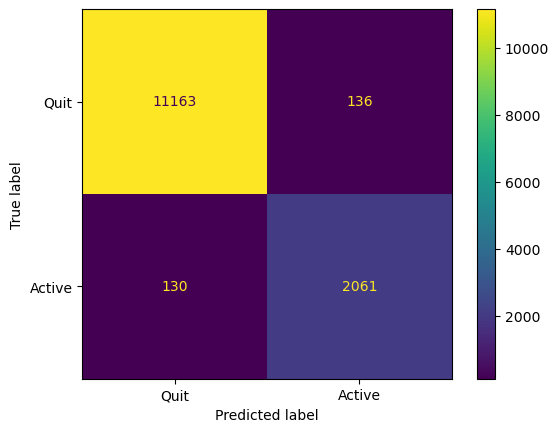

In [183]:
# Question 13: Generate a confusion matrix for the results. How many 
# students are active, but predicted to quit?
from sklearn import metrics
from matplotlib import pyplot as plt

cm = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(cm, display_labels=['Quit', 'Active'])
cm_display.plot(values_format='d')
plt.show()

In [184]:
# Question 14: Generate the accuracy, precision, recall, and f1 scores for 
# the predictions of active students. What is the accuracy score?

y_test_dummies = pd.get_dummies(y_test, drop_first=True)
y_pred_dummies = pd.get_dummies(y_pred, drop_first=True)
# Accuracy  = (true positives + true negatives) / (total cases); ranges from 0 (worst) to 1 (best)
print(f"Accuracy:\t{metrics.accuracy_score(y_test, y_pred)}")

# Precision = (true positives / (true positives + false positives))
print(f"Precision:\t{metrics.precision_score(y_test_dummies, y_pred_dummies)}")

# Recall    = (true positives / (true positives + false negatives)) 
print(f"Recall:\t\t{metrics.recall_score(y_test_dummies, y_pred_dummies)}")

# F1        = (2 * (precision * recall) / (precision + recall))
print(f"F1:\t\t{metrics.f1_score(y_test_dummies, y_pred_dummies)}")

Accuracy:	0.9802816901408451
Precision:	0.9380974055530269
Recall:		0.9406663623916021
F1:		0.9393801276207839


### Visualize Classification Model

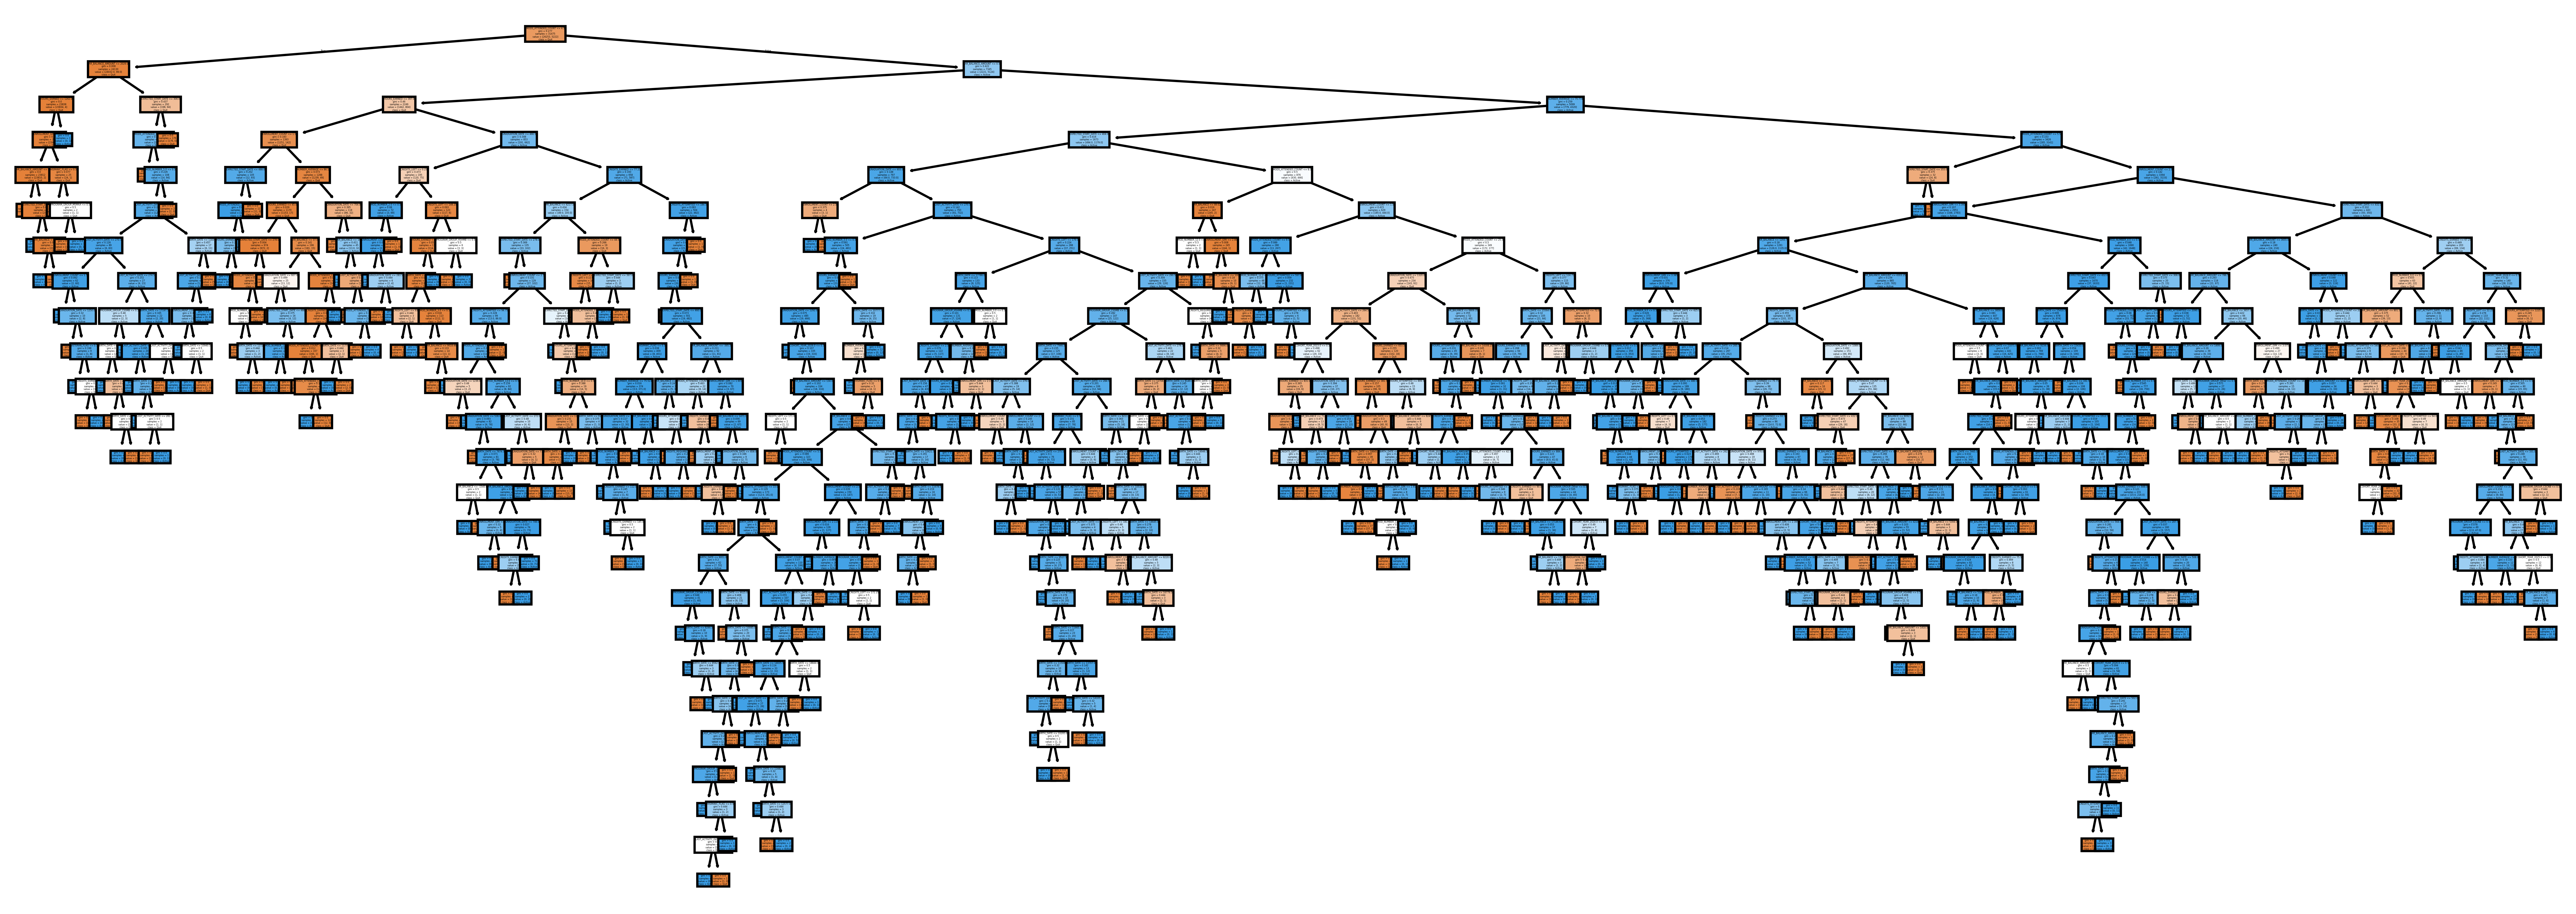

In [17]:
# Question 15: Generate a tree visualization using export_graphviz. 
# What feature is used in the most important feature?
from sklearn import tree

plt.subplots(nrows=1, ncols=1, figsize=(20, 7), dpi=600)
tree.plot_tree(model, feature_names=X.columns, class_names=['Quit', 'Active'], filled=True);

# **Multi-Class Modeling**

## **Data Cleaning**

### Combine or Eliminate Low Frequency Values

In [210]:
# Question 16: The label 'IN_SCHOOL_FLAG' was ideal for a two-class classification
# model. However, most students are put on probation before they are terminated. 
# Therefore, it could be useful to predict three distinct categories: Active, 
# Probation, and Terminated. First, let's identify what all possible label combinations
# exist across all three labels. Print a list of all value combinations of 
# 'STATUS_DESCRIPTION', 'IN_SCHOOL_FLAG', and 'SIMPLE_STATUS_DESCRIPTION' along 
# with a count of how often each occurs. 

# HINT: consider using the .groupby() method of Pandas to perform this in a single
# line of code. See the image below for an example of what this may look like.
# The purpose behind this task is to explore our options for potential labels in
# this dataset. Each of those features represent current states for each student.

df_3 = copy_df.copy()
status_counts = df_3.groupby(['STATUS_DESCRIPTION', 'IN_SCHOOL_FLAG', 'SIMPLE_STATUS_DESCRIPTION']).size()

# Convert to DataFrame for better formatting
status_counts = status_counts.reset_index(name='Count')

# Print the result
display(status_counts)

STATUS_DESCRIPTION  IN_SCHOOL_FLAG SIMPLE_STATUS_DESCRIPTION  \
0                        Active             1.0                    Active   
1               Active-Pre Grad             1.0                    Active   
2                     Applicant             0.0                     Other   
3         Application Cancelled             0.0                     Other   
4                        Cancel             0.0                Terminated   
5                     Dismissed             0.0                Terminated   
6                          Drop             0.0                Terminated   
7                False Re-Enter             0.0                Terminated   
8                   False Start             0.0                Terminated   
9                  Future Start             0.0                     Other   
10                     Graduate             1.0                    Active   
11                 NDS-Complete             0.0                     Other   
12                     NDS-Drop             0.0                     Other   
13                      No Show             0.0                Terminated   
14                    Probation             1.0                    Active   
15                     Re-Enter             0.0                     Other   
16                     Re-Start             0.0                     Other   
17  Transfer From Other Program             0.0                     Other   
18    Transfer To Other Program             0.0                Terminated   

    Count  
0    6585  
1     287  
2    1484  
3    9883  
4    1633  
5     203  
6    1562  
7     460  
8    4074  
9     876  
10    317  
11      1  
12      1  
13  17229  
14    224  
15     26  
16     60  
17      7  
18     53

In [211]:
# Question 17: To simplify our eventual model, eliminate all records for students
# whose 'SIMPLE_STATUS_DESCRIPTION' = 'Other'. Then, reprint the table above to 
# ensure it worked properly.
df_3 = df_3[df_3['SIMPLE_STATUS_DESCRIPTION'] != 'Other']
status_counts = df_3.groupby(['STATUS_DESCRIPTION', 'IN_SCHOOL_FLAG', 'SIMPLE_STATUS_DESCRIPTION']).size()
status_counts = status_counts.reset_index(name='Count')
display(status_counts)

STATUS_DESCRIPTION  IN_SCHOOL_FLAG SIMPLE_STATUS_DESCRIPTION  Count
0                      Active             1.0                    Active   6585
1             Active-Pre Grad             1.0                    Active    287
2                      Cancel             0.0                Terminated   1633
3                   Dismissed             0.0                Terminated    203
4                        Drop             0.0                Terminated   1562
5              False Re-Enter             0.0                Terminated    460
6                 False Start             0.0                Terminated   4074
7                    Graduate             1.0                    Active    317
8                     No Show             0.0                Terminated  17229
9                   Probation             1.0                    Active    224
10  Transfer To Other Program             0.0                Terminated     53

In [212]:
# Question 18: Next, eliminate anyone whose 'STATUS_DESCRIPTION' = 
# 'Transfer To Other Program', 'No Show', or 'False Start' since those outcomes
# are not relevant to students who were once active. Re-print the same summary
# table afterward.

statuses_to_remove = ['Transfer To Other Program', 'No Show', 'False Start']
# Remove rows where 'STATUS_DESCRIPTION' matches any of the above
df_3 = df_3[~df_3['STATUS_DESCRIPTION'].isin(statuses_to_remove)]


status_counts = df_3.groupby(['STATUS_DESCRIPTION', 'IN_SCHOOL_FLAG', 'SIMPLE_STATUS_DESCRIPTION']).size()
status_counts = status_counts.reset_index(name='Count')
display(status_counts)

STATUS_DESCRIPTION  IN_SCHOOL_FLAG SIMPLE_STATUS_DESCRIPTION  Count
0             Active             1.0                    Active   6585
1    Active-Pre Grad             1.0                    Active    287
2             Cancel             0.0                Terminated   1633
3          Dismissed             0.0                Terminated    203
4               Drop             0.0                Terminated   1562
5     False Re-Enter             0.0                Terminated    460
6           Graduate             1.0                    Active    317
7          Probation             1.0                    Active    224

In [213]:
# Question 19: Finally, relabel the 'SIMPLE_STATUS_DESCRIPTION' of those whose
# 'STATUS_DESCRIPTION' = 'Probation' to 'Probation'. Re-print the table.

df_3.loc[df_3['STATUS_DESCRIPTION'] == 'Probation', 'SIMPLE_STATUS_DESCRIPTION'] = 'Probation'

status_counts = df_3.groupby(['STATUS_DESCRIPTION', 'IN_SCHOOL_FLAG', 'SIMPLE_STATUS_DESCRIPTION']).size()
status_counts = status_counts.reset_index(name='Count')
display(status_counts)

STATUS_DESCRIPTION  IN_SCHOOL_FLAG SIMPLE_STATUS_DESCRIPTION  Count
0             Active             1.0                    Active   6585
1    Active-Pre Grad             1.0                    Active    287
2             Cancel             0.0                Terminated   1633
3          Dismissed             0.0                Terminated    203
4               Drop             0.0                Terminated   1562
5     False Re-Enter             0.0                Terminated    460
6           Graduate             1.0                    Active    317
7          Probation             1.0                 Probation    224

## **Classification Modeling**

### Dummy Codes

In [233]:
# Question 20: Create a new copy of the DataFrame to work from. The features
# 'MOD_NUMBER' and 'COHORT_YEAR' represent categorical values that do not have an 
# order. Therefore, they should be treated as categories and cast to objects. Once
# you have done so, drop the alternative labels 'STATUS_DESCRIPTION' and 
# 'IN_SCHOOL_FLAG' from the dataset because we will be predicting 
# 'SIMPLE_STATUS_DESCRIPTION'. Then, generate dummy codes for the remaining features.
# Print out the first five records to verify everything worked correctly.

df_4 = df_3.copy()

df_4['MOD_NUMBER'] = df_4['MOD_NUMBER'].astype(object)
df_4['COHORT_YEAR'] = df_4['COHORT_YEAR'].astype(object)

df_4.drop(columns=['STATUS_DESCRIPTION', 'IN_SCHOOL_FLAG'], inplace=True)

X = pd.get_dummies(df_4.drop(columns=['SIMPLE_STATUS_DESCRIPTION']), drop_first=True, dtype=int)

df_4.head()

EXPECTED_START_DATE  GRADUATION_DATE  ENROLL_COUNT  NUMBER_AVERAGE  \
3274                  264             1012           1.0        0.000000   
3275                  264             1544           1.0        0.000000   
3280                  264              956           1.0       85.130435   
3282                  264             1012           1.0        0.000000   
3293                  264             1544           1.0        0.000000   

      HOURS_ATTEMPTED  HOURS_EARNED  AR_BALANCE_AMOUNT  DAYS_ABSENT  \
3274              0.0           0.0             9040.0          0.0   
3275              0.0           0.0             8160.0          0.0   
3280            120.0         120.0             9040.0          0.0   
3282              0.0           0.0             9040.0          0.0   
3293              0.0           0.0             8160.0          0.0   

      REENTRY_NUMBER PROGRAM_GROUP  ...  CREDITS_EARNED  CREDITS_REQUIRED  \
3274             0.0         MSMAA  ...             0.0              95.0   
3275             0.0         GAGAB  ...             0.0             183.0   
3280             0.0         MSMAA  ...            11.5              95.0   
3282             0.0         MSMAA  ...             0.0              95.0   
3293             0.0         GAGAB  ...             0.0             183.0   

     CREDITS_LEFT ENROLLMENT_COUNT  MODS_ATTENDED_COUNT  HS_GRADUATED_FLAG  \
3274         95.0              2.0                  5.0                0.0   
3275        183.0              1.0                  5.0                0.0   
3280         83.5              6.0                 16.0                0.0   
3282         95.0              2.0                  5.0                0.0   
3293        183.0              2.0                  5.0                0.0   

      DISABLED_FLAG  HISPANIC_FLAG  VETERAN_FLAG  SIMPLE_STATUS_DESCRIPTION  
3274            0.0            0.0           0.0                     Active  
3275            0.0            1.0           0.0                     Active  
3280            0.0            0.0           0.0                     Active  
3282            0.0            0.0           0.0                     Active  
3293            0.0            0.0           0.0                     Active  

[5 rows x 27 columns]

### Select Label and Features

In [234]:
# Question 21: Create the y and X variables to store the label and features
# using 'SIMPLE_STATUS_DESCRIPTION' as the label. Print out the first five 
# records of X to make sure everything looks correct.
y = df_4['SIMPLE_STATUS_DESCRIPTION']

X.head()

EXPECTED_START_DATE  GRADUATION_DATE  ENROLL_COUNT  NUMBER_AVERAGE  \
3274                  264             1012           1.0        0.000000   
3275                  264             1544           1.0        0.000000   
3280                  264              956           1.0       85.130435   
3282                  264             1012           1.0        0.000000   
3293                  264             1544           1.0        0.000000   

      HOURS_ATTEMPTED  HOURS_EARNED  AR_BALANCE_AMOUNT  DAYS_ABSENT  \
3274              0.0           0.0             9040.0          0.0   
3275              0.0           0.0             8160.0          0.0   
3280            120.0         120.0             9040.0          0.0   
3282              0.0           0.0             9040.0          0.0   
3293              0.0           0.0             8160.0          0.0   

      REENTRY_NUMBER  BIRTH_DATE  ...  MOD_NUMBER_8.0  MOD_NUMBER_9.0  \
3274             0.0       10429  ...               0               0   
3275             0.0       10920  ...               0               0   
3280             0.0        7914  ...               0               0   
3282             0.0        7604  ...               0               0   
3293             0.0       13462  ...               0               0   

      MOD_NUMBER_10.0  MOD_NUMBER_11.0  MOD_NUMBER_12.0  MOD_NUMBER_13.0  \
3274                0                0                0                0   
3275                0                0                0                0   
3280                0                0                0                0   
3282                0                0                0                0   
3293                0                0                0                0   

      COHORT_YEAR_2023.0  COHORT_YEAR_2024.0  COHORT_YEAR_2025.0  \
3274                   0                   1                   0   
3275                   0                   0                   0   
3280                   0                   1                   0   
3282                   0                   1                   0   
3293                   0                   0                   0   

      COHORT_YEAR_2026.0  
3274                   0  
3275                   1  
3280                   0  
3282                   0  
3293                   1  

[5 rows x 44 columns]

### Split Data

In [235]:
# Question 22: Split the data using 70/30 split and 12345 as the random seed
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12345)
X_test.head()

EXPECTED_START_DATE  GRADUATION_DATE  ENROLL_COUNT  NUMBER_AVERAGE  \
17237                  348             1488           1.0       92.333333   
15035                  320              732           1.0       96.083333   
18248                  348              385           1.0        0.000000   
9492                   292             1516           1.0       90.000000   
46266                  530              522           1.0       73.894737   

       HOURS_ATTEMPTED  HOURS_EARNED  AR_BALANCE_AMOUNT  DAYS_ABSENT  \
17237            150.0         150.0             306.00          0.0   
15035           1279.0        1279.0               0.00          0.0   
18248              0.0           0.0               0.00          0.0   
9492              50.0          50.0            8135.00          0.0   
46266           1300.0         950.0            6435.67          0.0   

       REENTRY_NUMBER  BIRTH_DATE  ...  MOD_NUMBER_8.0  MOD_NUMBER_9.0  \
17237             0.0       15621  ...               0               0   
15035             0.0       10255  ...               0               0   
18248             0.0       11789  ...               0               0   
9492              0.0        9317  ...               0               0   
46266             0.0       11867  ...               1               0   

       MOD_NUMBER_10.0  MOD_NUMBER_11.0  MOD_NUMBER_12.0  MOD_NUMBER_13.0  \
17237                0                0                0                0   
15035                0                0                0                0   
18248                0                0                0                0   
9492                 0                0                0                0   
46266                0                0                0                0   

       COHORT_YEAR_2023.0  COHORT_YEAR_2024.0  COHORT_YEAR_2025.0  \
17237                   0                   0                   0   
15035                   0                   0                   0   
18248                   0                   0                   0   
9492                    0                   0                   0   
46266                   1                   0                   0   

       COHORT_YEAR_2026.0  
17237                   1  
15035                   1  
18248                   1  
9492                    1  
46266                   0  

[5 rows x 44 columns]

### Create Classifier and Fit Model

In [236]:
# Question 23: Train a decision tree classifier model using the datasets
# you just generated.
model = DecisionTreeClassifier(random_state=12345).fit(X_train, y_train)

### Compare Actual Versus Predicted Values

In [237]:
# Question 24: Predict the y values for the testing dataset and add them to
# a DataFrame along with the actual y values for comparison. Print out the 
# first 20 records. 
y_pred = model.predict(X_test)

df_results = pd.DataFrame({'Actual' : y_test, 'Predicted' : y_pred})
df_results.head(20)

Actual   Predicted
17237      Active      Active
15035      Active      Active
18248  Terminated  Terminated
9492       Active      Active
46266   Probation  Terminated
3394       Active      Active
29770      Active  Terminated
41249  Terminated  Terminated
39809      Active      Active
20634      Active      Active
34749  Terminated      Active
8979       Active      Active
20887      Active      Active
40083      Active      Active
28474      Active      Active
3280       Active      Active
36720  Terminated  Terminated
17733      Active      Active
22203      Active      Active
42070  Terminated  Terminated

### Assess Model Fit/Quality/Accuracy

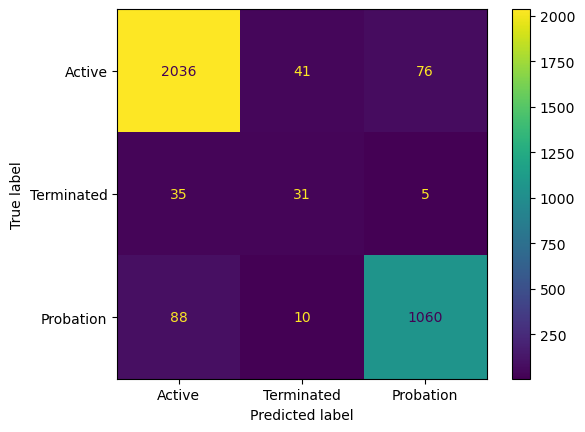

In [238]:
# Question 25: Generate and print a confusion matrix to view the results. 
cm = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(cm, display_labels=y.unique())
cm_display.plot(values_format='d')
plt.show()

In [ ]:
# Question 26: Generate the fit metrics (precision, recall, f1) for the 
# label value 'terminated' and the overall accuracy
y_test_dummies = pd.get_dummies(y_test, drop_first=True)
y_pred_dummies = pd.get_dummies(y_pred, drop_first=True)

df_report = pd.DataFrame(metrics.classification_report(y_test_dummies, y_pred_dummies, output_dict=True))
df_report

c:\Users\camde\miniconda3\envs\cs110\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\camde\miniconda3\envs\cs110\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\camde\miniconda3\envs\cs110\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in samples with no true nor predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


0            1    micro avg    macro avg  weighted avg  \
precision   0.378049     0.929010     0.892069     0.653529      0.897180   
recall      0.436620     0.915371     0.887714     0.675996      0.887714   
f1-score    0.405229     0.922140     0.889886     0.663684      0.892278   
support    71.000000  1158.000000  1229.000000  1229.000000   1229.000000   

           samples avg  
precision      0.32259  
recall         0.32259  
f1-score       0.32259  
support     1229.00000

### Visualize Classification Model

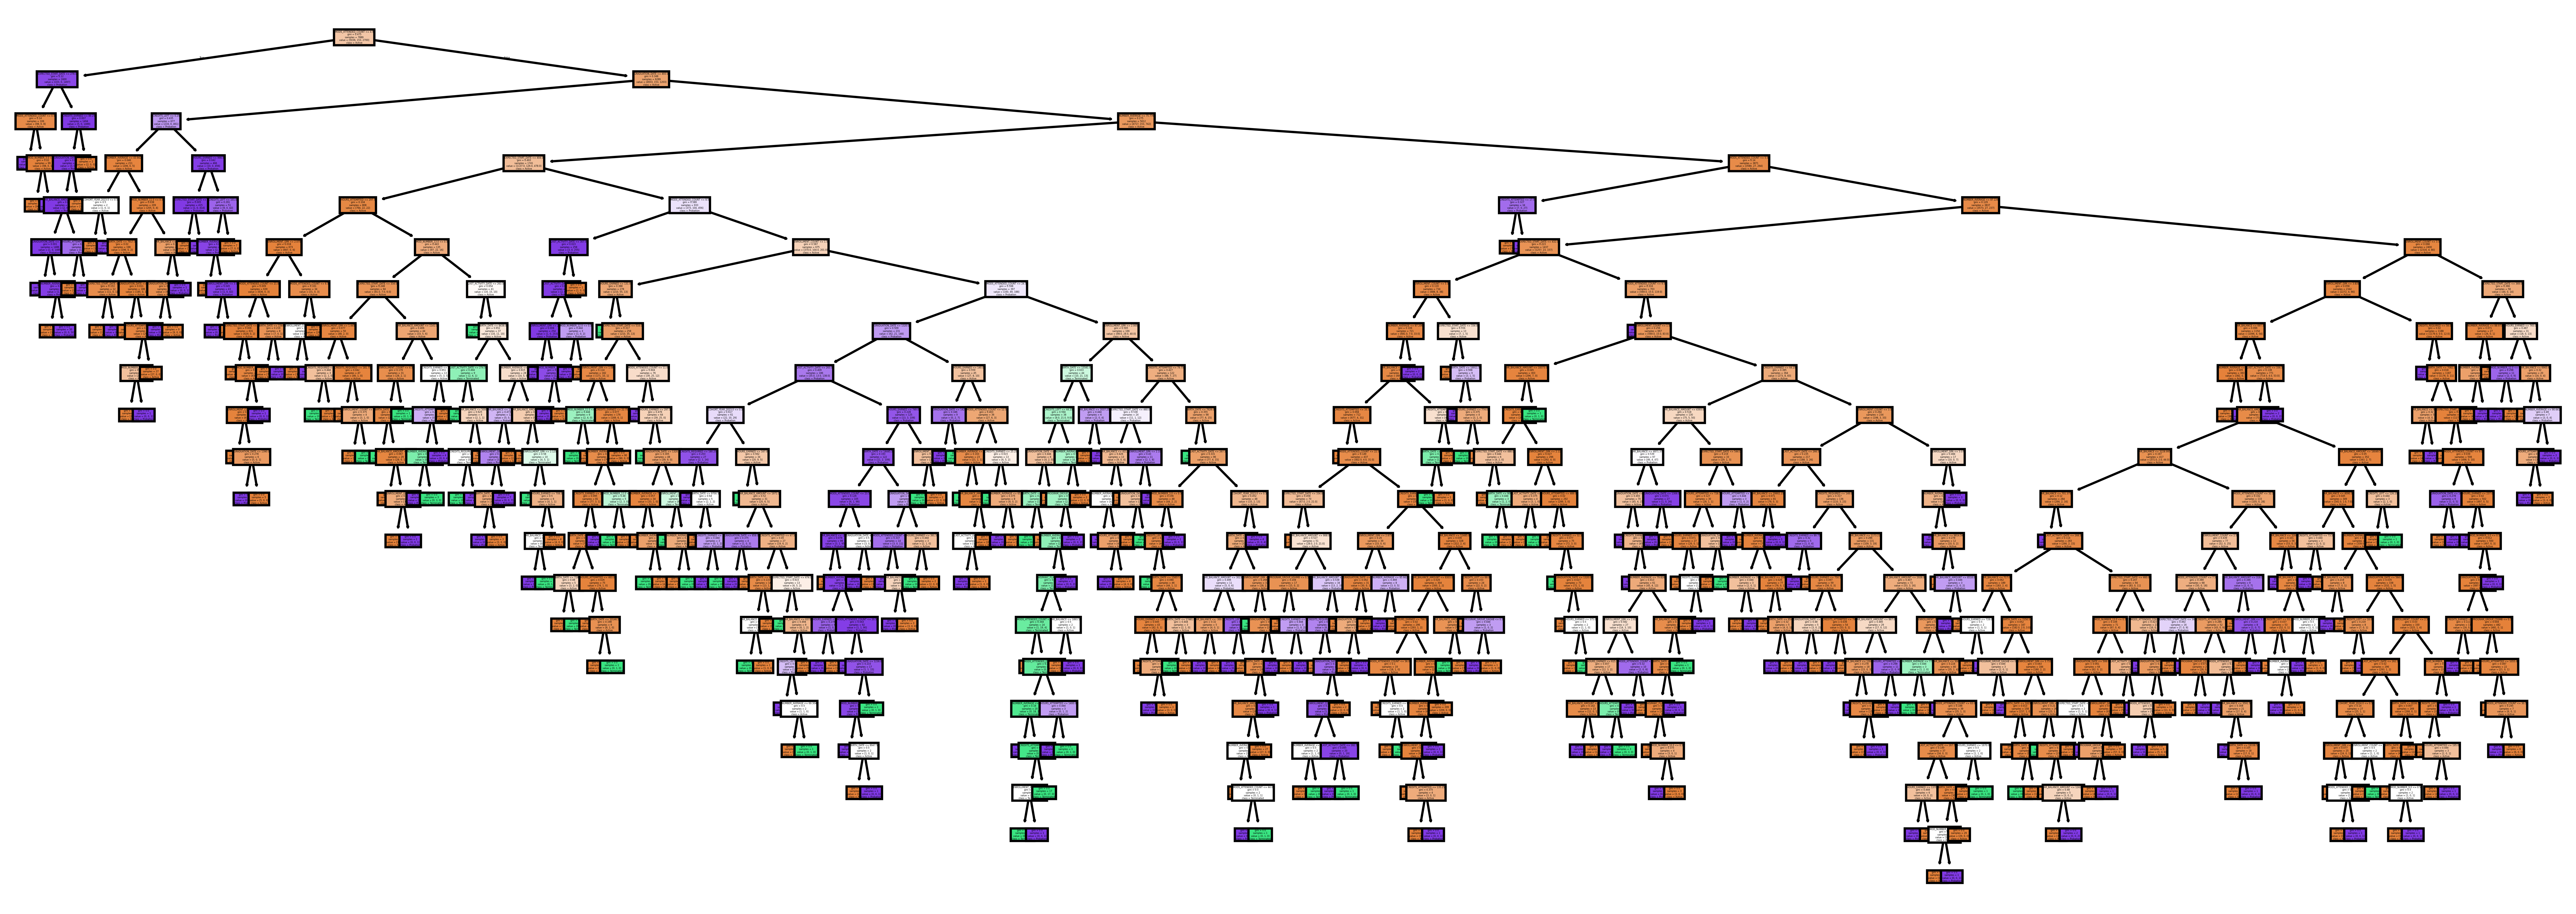

In [241]:
# Question 27: Generate a decision tree visualization using export_graphviz
plt.subplots(nrows=1, ncols=1, figsize=(20, 7), dpi=600)
tree.plot_tree(model, feature_names=X.columns, class_names=y.unique(), filled=True);